In [6]:
import sys
from pathlib import Path

# Add app to path if running from notebooks directory
if 'app' not in sys.path:
    sys.path.insert(0, str(Path.cwd().parent))

In [8]:
from app.processors.pdf_processor import PDFProcessor
from app.processors import ProcessorFactory

# process_file("./data/uploads/179124.pdf")

factory = ProcessorFactory()

# pdf_processor = PDFProcessor()
# ls_docs = pdf_processor.process("./data/uploads/179124.pdf")

In [10]:
factory.supported_extensions

['.pdf',
 '.docx',
 '.doc',
 '.xlsx',
 '.xls',
 '.csv',
 '.tsv',
 '.pptx',
 '.ppt',
 '.png',
 '.jpg',
 '.jpeg',
 '.gif',
 '.webp',
 '.bmp',
 '.txt',
 '.md',
 '.markdown',
 '.rst',
 '.text']

In [13]:
factory._extension_map

{'.pdf': <app.processors.pdf_processor.PDFProcessor at 0x1eef4617770>,
 '.docx': <app.processors.docx_processor.DocxProcessor at 0x1eef4617cb0>,
 '.doc': <app.processors.docx_processor.DocxProcessor at 0x1eef4617cb0>,
 '.xlsx': <app.processors.xlsx_processor.ExcelProcessor at 0x1eef4da0050>,
 '.xls': <app.processors.xlsx_processor.ExcelProcessor at 0x1eef4da0050>,
 '.csv': <app.processors.xlsx_processor.ExcelProcessor at 0x1eef4da0050>,
 '.tsv': <app.processors.xlsx_processor.ExcelProcessor at 0x1eef4da0050>,
 '.pptx': <app.processors.pptx_processor.PowerPointProcessor at 0x1eef4da01a0>,
 '.ppt': <app.processors.pptx_processor.PowerPointProcessor at 0x1eef4da01a0>,
 '.png': <app.processors.image_processor.ImageProcessor at 0x1eef4da02f0>,
 '.jpg': <app.processors.image_processor.ImageProcessor at 0x1eef4da02f0>,
 '.jpeg': <app.processors.image_processor.ImageProcessor at 0x1eef4da02f0>,
 '.gif': <app.processors.image_processor.ImageProcessor at 0x1eef4da02f0>,
 '.webp': <app.processors

In [11]:
factory.is_supported("./data/uploads/179124.pdf")

True

In [12]:
factory._processors

In [39]:
ls_pdf = factory.process_file(file_path = "../data/uploads/179124.pdf")

In [59]:
import pprint
pprint.pprint(ls_pdf[0].to_dict(), width=180)

{'content': '# **SAFETY DATA SHEET**\n'
            '\n'
            'according to Regulation (EC) No. 1907/2006\n'
            '\n'
            '\n'
            '\n'
            'Version 6.12\n'
            '\n'
            'Revision Date 30.12.2023\n'
            '\n'
            '\n'
            '\n'
            'according to Regulation (EC) No. 1907/2006 Print Date 30.10.2025\n'
            '\n'
            'GENERIC EU MSDS - NO COUNTRY SPECIFIC DATA - NO OEL DATA\n'
            '\n'
            '**SECTION 1: Identification of the substance/mixture and of the company/undertaking**\n'
            '\n'
            '\n'
            '\n'
            '**1.1** **Product identifiers**\n'
            '## Product name : Acetone\n'
            '\n'
            '\n'
            'Product Number : 179124\n'
            '\n'
            'Brand : SIGALD\n'
            '\n'
            'Index-No. : 606-001-00-8\n'
            '\n'
            'REACH No. : 01-2119471330-49-XXXX\n'
            '\n'


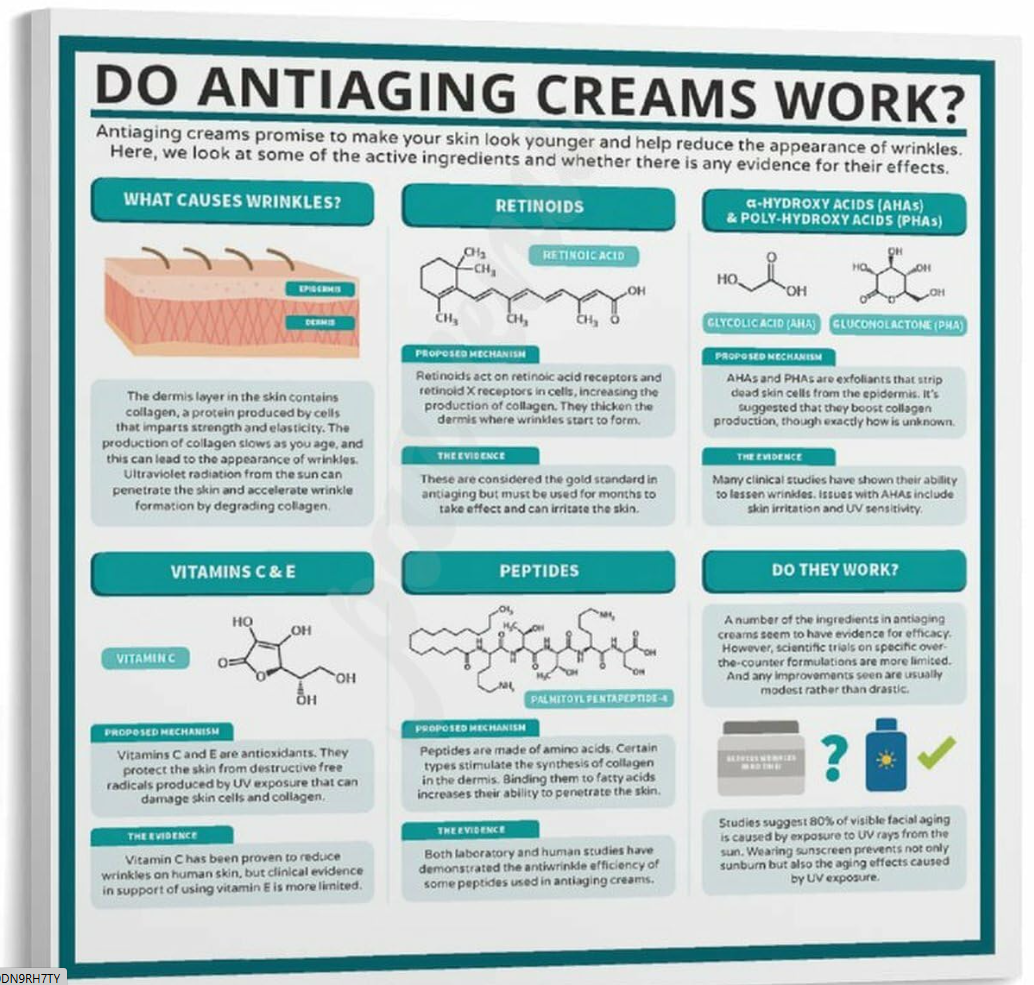

In [38]:
# Display image from path (in notebook) and adjust size
import IPython.display as display
display.Image(filename="../data/uploads/Anti-ageing mechanism.png", width=400)

In [61]:
ls_img = factory.process_file(file_path = "../data/uploads/Anti-ageing mechanism.png")
pprint.pprint(ls_img[0].to_dict(), width=180)

INFO:app.processors.factory:Processing Anti-ageing mechanism.png with ImageProcessor
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:app.processors.image_processor:Processed image Anti-ageing mechanism.png


{'content': '1. **Overall Description**:\n'
            '   - The image is an infographic exploring the effectiveness of anti-aging creams. It details the causes of wrinkles, the role of active ingredients like retinoids, '
            "α-hydroxy acids (AHAs), poly-hydroxy acids (PHAs), vitamins C & E, and peptides. It also discusses the underlying mechanisms and evidence for each ingredient's "
            'efficacy.\n'
            '\n'
            '2. **Text Content**:\n'
            '   - **Title**: "DO ANTIAGING CREAMS WORK?"\n'
            '   - **Subtitle**: "Antiaging creams promise to make your skin look younger and help reduce the appearance of wrinkles. Here, we look at some of the active '
            'ingredients and whether there is any evidence for their effects."\n'
            '   \n'
            '   - **Sections**:\n'
            '     - **WHAT CAUSES WRINKLES?**\n'
            '       - "The dermis layer in the skin contains collagen, a protein produced by cells that 

In [69]:
def process_folder(folder_path: Path):
        """
        Processes all the files within a folder.

        Parameters
        ----------
        folder_path : Path
            Path to folder.

        Returns
        -------
        List[Document]
            Processed documents.
        
        """
        folder_path = Path(folder_path)

        if not folder_path.exists():
            raise FileNotFoundError(f"Folder not found: {folder_path}")
        if not folder_path.is_dir():
            raise NotADirectoryError(f"Not a directory: {folder_path}")

        documents = []

        for path in folder_path.rglob("*"):
            try:
                print("Processing file in folder: %s", path)
                documents.extend(factory.process_file(path))
            except Exception:
                print("Failed to process file: %s", path)
                # continue processing other files despite individual failures

        return documents

In [71]:
docs_processed = process_folder(folder_path = "../data/uploads/")

INFO:app.processors.factory:Processing 179124.pdf with PDFProcessor


Processing file in folder: %s ..\data\uploads\.gitkeep
Failed to process file: %s ..\data\uploads\.gitkeep
Processing file in folder: %s ..\data\uploads\179124.pdf


INFO:app.processors.pdf_processor:Extracted 14 pages from 179124.pdf
INFO:app.processors.factory:Processing Anti-ageing mechanism.png with ImageProcessor


Processing file in folder: %s ..\data\uploads\Anti-ageing mechanism.png


In [72]:
docs_processed

[Document(content='# **SAFETY DATA SHEET**\n\naccording to Regulation (EC) No. 1907/2006\n\n\n\nVersion 6.12\n\nRevision Date 30.12.2023\n\n\n\naccording to Regulation (EC) No. 1907/2006 Print Date 30.10.2025\n\nGENERIC EU MSDS - NO COUNTRY SPECIFIC DATA - NO OEL DATA\n\n**SECTION 1: Identification of the substance/mixture and of the company/undertaking**\n\n\n\n**1.1** **Product identifiers**\n## Product name : Acetone\n\n\nProduct Number : 179124\n\nBrand : SIGALD\n\nIndex-No. : 606-001-00-8\n\nREACH No. : 01-2119471330-49-XXXX\n\nCAS-No. : 67-64-1\n\n\n**1.2** **Relevant identified uses of the substance or mixture and uses advised against**\n\n\nIdentified uses : Laboratory chemicals, Manufacture of substances\n\n\n**1.3** **Details of the supplier of the safety data sheet**\n\n\nCompany : Merck Life Science S.A.S\n\n80 Rue de Luzais\nF-38297 SAINT QUENTIN FALLAVIER CEDEX\n\nTelephone : +33 (0)1 85 16 94 34\nE-mail address : servicetechnique@merckgroup.com\n\n\n**1.4** **Emergency t

In [74]:
# Chunking the resulting document
from app.chunking.chunker import ChunkConfig, TextChunker

config = ChunkConfig(chunk_size=250, chunk_overlap=25)

chunker = TextChunker(config)
docs_processed_chunked = chunker.chunk_documents(docs_processed)

INFO:app.chunking.chunker:Chunked 24 documents into 243 chunks


In [76]:
docs_processed_chunked[0].to_dict()

{'content': '# **SAFETY DATA SHEET**\n\naccording to Regulation (EC) No. 1907/2006\n\nVersion 6.12\n\nRevision Date 30.12.2023',
 'metadata': {'source_file': '179124.pdf',
  'file_type': 'pdf',
  'page_number': 1,
  'timestamp': '2025-11-28T14:00:29.250602',
  'extraction_method': 'pymupdf4llm',
  'chunk_index': 0,
  'total_chunks': 8,
  'original_length': 1514},
 'embedding': None}

In [78]:
from app.embeddings.embedding import get_embedder, embed_async, get_embedding_dimension

embedder = get_embedder()
print(f"Embedder model: {embedder.__class__.__name__}")

# texts = [
#     "Evaluating the stability of new emulsifier systems to reduce viscosity drift in water-in-oil formulations.",
#     "Exploring plant-based silicone alternatives to improve sensorial feel without compromising spreadability.",
#     "Benchmarking natural preservative blends to replace phenoxyethanol while maintaining broad-spectrum efficacy.",
#     "Optimizing surfactant ratios to achieve mild cleansing profiles suitable for sensitive-skin claims.",
#     "Assessing compatibility of novel biopolymer thickeners with electrolyte-heavy formulations.",
#     "Incorporating upcycled botanical extracts to enhance antioxidant capacity in skin care serums.",
#     "Testing encapsulated fragrance technologies to improve longevity and reduce potential irritation.",
#     "Developing sulfate-free shampoo bases using mild anionic–amphoteric surfactant combinations.",
#     "Analyzing the rheology impact of replacing traditional waxes with biodegradable structuring agents.",
#     "Screening cold-processable emulsifiers to reduce energy use in manufacturing while maintaining texture."
# ]

texts = [doc.content for doc in docs_processed_chunked]
embeddings = embed_async(texts)
vectors = await embeddings

print(f"Embedding dimension: {get_embedding_dimension()}")
for i, emb in enumerate(vectors):
    print(f"Text {i+1} embedding (first 5 values): {emb[:5]}")

INFO:app.embeddings.embedding:Loading embedding model: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Embedder model: SentenceTransformer


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Embedding dimension: 384
Text 1 embedding (first 5 values): [-0.03901059  0.04747833 -0.05649946 -0.05352588  0.10341942]
Text 2 embedding (first 5 values): [-0.03053699 -0.01235558 -0.00065143  0.03027994  0.05461208]
Text 3 embedding (first 5 values): [-0.06346745  0.03827326 -0.03186938 -0.02020515 -0.01442356]
Text 4 embedding (first 5 values): [ 0.02485461 -0.01862661 -0.04846953 -0.00954241  0.03620017]
Text 5 embedding (first 5 values): [-0.01696625  0.00474154 -0.04325665 -0.01038733  0.09584271]
Text 6 embedding (first 5 values): [-0.07214745  0.0766221   0.00939916 -0.01091771  0.03398052]
Text 7 embedding (first 5 values): [ 0.07293228 -0.06041364 -0.02272057  0.01557312  0.14785749]
Text 8 embedding (first 5 values): [ 0.0126972  -0.0342779  -0.06978349  0.04532652  0.13527678]
Text 9 embedding (first 5 values): [ 0.0218796  -0.00600028 -0.05504274  0.01924455  0.12328537]
Text 10 embedding (first 5 values): [-0.01304249 -0.03287628  0.0009336   0.0028313   0.08650952]
Text

In [90]:
for doc, vec in zip(docs_processed_chunked, vectors):
    doc.embedding = vec.tolist()


In [99]:
docs_processed_chunked[-7].to_dict()

{'content': '1. **Overall Description**: \n   - The image depicts a zebra standing in an open grassland. The zebra is facing the camera with its full body visible, showcasing its signature black and white stripes.',
 'metadata': {'source_file': 'zebra.webp',
  'file_type': 'image',
  'page_number': None,
  'timestamp': '2025-11-28T14:01:37.504381',
  'image_format': 'webp',
  'size_kb': 141.150390625,
  'width': 853,
  'height': 1280,
  'mode': 'RGB',
  'chunk_index': 0,
  'total_chunks': 7,
  'original_length': 1109},
 'embedding': [-0.11780630052089691,
  0.12239115685224533,
  0.01999015174806118,
  -0.03169320896267891,
  0.04473475366830826,
  -0.006650683004409075,
  0.016640635207295418,
  -0.03283146023750305,
  -0.007595807779580355,
  -0.011630631051957607,
  0.029628854244947433,
  -0.1097608357667923,
  -0.038655318319797516,
  -0.011619290336966515,
  -0.03659990802407265,
  0.030339326709508896,
  -0.0070367297157645226,
  -0.03738923743367195,
  -0.021921982988715172,
  

In [ ]:
from app.opensearch.opensearch_client import get_client, ensure_index_exists, get_document_stats, bulk_insert
from app.config import INDEX_NAME


client = get_client()
client

<OpenSearch([{'host': 'localhost', 'port': 9200}])>

In [ ]:
ensure_index_exists(index_name=INDEX_NAME)

In [107]:
get_document_stats()

INFO:opensearch:POST http://localhost:9200/multimodal_docs/_count [status:200 request:0.040s]
INFO:opensearch:POST http://localhost:9200/multimodal_docs/_search [status:200 request:0.076s]


{'total_documents': 37,
 'file_types': {'pdf': 32, 'text': 5},
 'source_files': ['179124.pdf', 'formulation_guide'],
 'index_name': 'multimodal_docs'}

In [108]:
docs_processed_chunked_dict = [doc.to_dict() for doc in docs_processed_chunked]

# Insert to index
response = bulk_insert(documents=docs_processed_chunked_dict)

INFO:opensearch:HEAD http://localhost:9200/multimodal_docs [status:200 request:0.007s]
INFO:app.opensearch.opensearch_client:Index multimodal_docs already exists
INFO:opensearch:POST http://localhost:9200/_bulk?refresh=true [status:200 request:0.671s]
INFO:app.opensearch.opensearch_client:Inserted 243/243 documents


In [112]:
get_document_stats(index_name=INDEX_NAME)

INFO:opensearch:POST http://localhost:9200/multimodal_docs/_count [status:200 request:0.008s]
INFO:opensearch:POST http://localhost:9200/multimodal_docs/_search [status:200 request:0.053s]


{'total_documents': 280,
 'file_types': {'pdf': 236, 'image': 39, 'text': 5},
 'source_files': ['179124.pdf',
  'S25255.pdf',
  'Anti-ageing mechanism.png',
  'Anti-wrinkle guide.png',
  'zebra.webp',
  'formulation_guide'],
 'index_name': 'multimodal_docs'}